# Knn (Classification) from Scratch

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import mean_squared_error, r2_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [10]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
knn = KNN(k=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Class labels mapping:")
for i, class_name in enumerate(iris.target_names):
    print(f"{i}: {class_name}")

print("Training Set:")
y_train_pred = knn.predict(X_train)
for actual, predicted in zip(y_train, y_train_pred):
    print(f"Actual: {actual} ({iris.target_names[actual]}), Predicted: {predicted} ({iris.target_names[predicted]})")

print("\nTesting Set:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual} ({iris.target_names[actual]}), Predicted: {predicted} ({iris.target_names[predicted]})")

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'\nKNN classification accuracy: {accuracy * 100:.2f}%')

Class labels mapping:
0: setosa
1: versicolor
2: virginica
Training Set:
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R2 Score: 1.0000


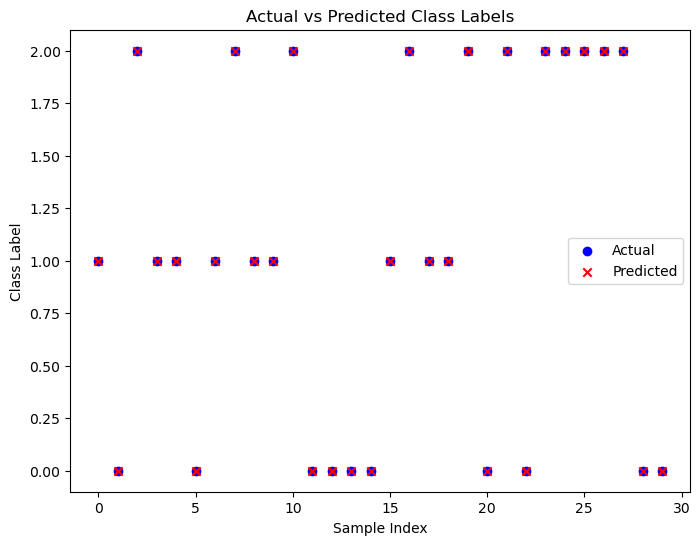

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

# Visualization - Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Class Labels')
plt.legend()
plt.show()